¡Hola, Carlos!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Carlos! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [339]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con la carga de la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [340]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('datasets/megaline_calls.csv')
internet = pd.read_csv('datasets/megaline_internet.csv')
messages = pd.read_csv('datasets/megaline_messages.csv')
plans = pd.read_csv('datasets/megaline_plans.csv')
users = pd.read_csv('datasets/megaline_users.csv')

In [506]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [341]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [342]:
# Imprime una muestra de los datos para las tarifas

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Todos los datos se ven bien, quiza solamente "usd_monthly_pay" y "usd_per_gb" podrian ir en floats, pero no es completamente necesario. No tiene valores nulos.

### Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [343]:
# No es necesario, pero en caso de requerirlo lo quito de comentario

#plans[['usd_monthly_pay','usd_per_gb']] = plans[['usd_monthly_pay','usd_per_gb']].astype(float)
#plans.info()

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Usuarios/as

In [344]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [345]:
# Imprime una muestra de datos para usuarios

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

churn_date es la fecha en la que el usuraio dejo de usar el servicio. podria o no podria ser importante mas adelante, por lo pronto todos los datos estan correctos y sin valores ausentes. Quiza el unico seria mi columna de reg_date, que es cuando se suscribio, veine en formato (aaaa,mm,dd), podria ser conveniente pasarlo a una date.

No es muy importante todavia, necesitaria ver que mas se pide adelante, pero podria ser buena idea separar la ciudad, zona y estado. Esto para tener un analisis mas profundo.

In [346]:
users['churn_date'].isna().sum()

466

466, quiere decir que solo 34 clientes dejaron de usar el servicio.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [347]:
# Pasar reg_date y churn_date a datetime
# No es necesario aqui, pero en caso de serlo agregaria format='%Y-%m-%d'
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [348]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [349]:
# Imprime una muestra de datos para las llamadas

calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Veo que id contiene user id seguido del numero de la llamada o identificador. podria valer la pena remover esto pero bueno mas adelante lo ahre, dependiendo de que me pida el proyecto. Por otra parte, call_date lo pasare a un 'datetime', finalmente, agregaria una ultima columna llamada round_duration ya que se establece que sin contar la cantidad de segundos, siempre se redondea al minuto en cada llamada individual. Para esto usare la funcion np.ceil() de la libreria math.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [350]:
# Pasar call_date a datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Agrego mi columna de rounded_duration, para redondear el valor individual de cada llamada.

In [351]:
# Agregar una 5ta columna que redondee hacia arriba la duracion
calls['rounded_duration'] = np.ceil(calls['duration']).astype(int)
print(calls.head())

         id  user_id  call_date  duration  rounded_duration
0   1000_93     1000 2018-12-27      8.52                 9
1  1000_145     1000 2018-12-27     13.66                14
2  1000_247     1000 2018-12-27     14.48                15
3  1000_309     1000 2018-12-28      5.76                 6
4  1000_380     1000 2018-12-30      4.22                 5


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

## Mensajes

In [352]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [353]:
# Imprime una muestra de datos para los mensajes

messages.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Para mensajes opino similar a llamada, id (del mensahje) se conforma del user_id y el id del mensaje, lo dejare asi por lo pronto. Por otra parte cambiare mi message_date a datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [354]:
# Pasar message_date a datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [355]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [356]:
# Imprime una muestra de datos para el tráfico de internet

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No tengo datos ausentes, lo que si es que 'session_date' lo pasaria a datetime.

Hasta que saque el consumo mensual de mb es cuando deberia de redondear para arriba, 1024 es mi limite de mb antes de hacer brinco al siguiente GB.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [357]:
# Pasar session_date a datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [358]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [359]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Primero tengo que extraer el mes de mi columna tipo datetime
calls['month'] = calls['call_date'].dt.month

# Agrupo por user_id y month, uso id con un count para contar la cantidad de llamadas que hizo cada cliente
# number_calls = calls.groupby(['user_id','month'])['id'].count()

number_calls = calls.groupby(['user_id','month'],as_index=False).agg(
    total_calls = ('id','count')
)
number_calls.head()

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [360]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Uso mi duracion redondeada ya que eso es lo que se me pidio por llamada individual
minutes_calls = calls.groupby(['user_id','month'],as_index=False).agg(
    total_minutes = ('rounded_duration','sum')
)
minutes_calls.head()


,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [361]:
# Como las dos pasadas son sobre el mismo dataframe, podria juntarlas y hacerlo en un solo dataframe

minutes_number_calls = calls.groupby(['user_id','month'],as_index=False).agg(
    total_calls = ('id','count'),
    total_minutes = ('rounded_duration','sum')
)

minutes_number_calls.head()

,user_id,month,total_calls,total_minutes
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


In [362]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Primero tengo que extraer el mes de mi columna tipo datetime
messages['month'] = messages['message_date'].dt.month

# Agrupo por 'user_id' y 'month' y uso un count en id (identificador de cada mensaje)
number_messages = messages.groupby(['user_id','month'],as_index=False).agg(
    total_messages = ('id','count')
)
number_messages.head()

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [363]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Primero tengo que extraer el mes de mi columna tipo datetime
internet['month'] = internet['session_date'].dt.month

# Agrupo por 'user_id' y 'month', uso un sum() en 'mb_used'
total_internet = internet.groupby(['user_id','month'],as_index=False).agg(
    total_mb = ('mb_used','sum')
)
total_internet.head()

,user_id,month,total_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [364]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merged_user = pd.merge(minutes_number_calls, number_messages, on=['user_id', 'month'])
merged_user = pd.merge(merged_user, total_internet, on=['user_id', 'month'])
merged_user.head()

,user_id,month,total_calls,total_minutes,total_messages,total_mb
0,1000,12,16,124,11,1901.47
1,1001,8,27,182,30,6919.15
2,1001,9,49,315,44,13314.82
3,1001,10,65,393,53,22330.49
4,1001,11,64,426,36,18504.30


In [365]:
# Agrego mi df de user para poder sacar que plan tiene cada usuario

merged_user = pd.merge(merged_user, users[['user_id','plan']], on='user_id')
merged_user.head()

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan
0,1000,12,16,124,11,1901.47,ultimate
1,1001,8,27,182,30,6919.15,surf
2,1001,9,49,315,44,13314.82,surf
3,1001,10,65,393,53,22330.49,surf
4,1001,11,64,426,36,18504.30,surf


In [366]:
# Añade la información de la tarifa

merged_user = pd.merge(merged_user, plans, left_on='plan', right_on='plan_name')
merged_user.head()

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27,182,30,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49,315,44,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65,393,53,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64,426,36,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [367]:
# Calcula el ingreso mensual para cada usuario

# Calcular extras de mensajes, mb, y minutos
#merged_user['extra_messages'] = merged_user['messages_included'] - merged_user['total_messages']
#merged_user['extra_messages'] = merged_user['extra_messages'].apply(lambda x: 0 if x > 0 else -(x))

# Es mas optimo hacerlo de la siguiente forma, por que lo hago de forma vectorial, clip hace que todos los valores abajo de 'lower' me los clipee en el valor lower.
merged_user['extra_messages'] = (merged_user['total_messages'] - merged_user['messages_included']).clip(lower=0)
merged_user['extra_gb'] = (merged_user['total_mb'] - merged_user['mb_per_month_included']).clip(lower=0)
merged_user['extra_minutes'] = (merged_user['total_minutes'] - merged_user['minutes_included']).clip(lower=0)

# En la de extra_gb es necesario pasar mb a gb, el gb es 1024 mb, luego se redondea hacia arriba.
merged_user['extra_gb'] = np.ceil(merged_user['extra_gb'] / 1024).astype(int)

# Agrego el total adicional por mensaje, gb y minutos
merged_user['total_extra_messages'] = merged_user['usd_per_message'] * merged_user['extra_messages']
merged_user['total_extra_gb'] = merged_user['usd_per_gb'] * merged_user['extra_gb']
merged_user['total_extra_minutes'] = merged_user['usd_per_minute'] * merged_user['extra_minutes']

# Sumo los valores de total extra al costo del plan mensual
merged_user['total_monthly'] = merged_user['total_extra_messages'] + merged_user['total_extra_gb'] + merged_user['total_extra_minutes'] + merged_user['usd_monthly_pay']

# Imprimo head para ver como quedo mi df
merged_user.head()

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,plan_name,extra_messages,extra_gb,extra_minutes,total_extra_messages,total_extra_gb,total_extra_minutes,total_monthly
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,...,0.01,0.01,ultimate,0,0,0,0.00,0,0.0,70.00
1,1001,8,27,182,30,6919.15,surf,50,15360,500,...,0.03,0.03,surf,0,0,0,0.00,0,0.0,20.00
2,1001,9,49,315,44,13314.82,surf,50,15360,500,...,0.03,0.03,surf,0,0,0,0.00,0,0.0,20.00
3,1001,10,65,393,53,22330.49,surf,50,15360,500,...,0.03,0.03,surf,3,7,0,0.09,70,0.0,90.09
4,1001,11,64,426,36,18504.30,surf,50,15360,500,...,0.03,0.03,surf,0,4,0,0.00,40,0.0,60.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente forma de calcular el ingreso mensual por usuario

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

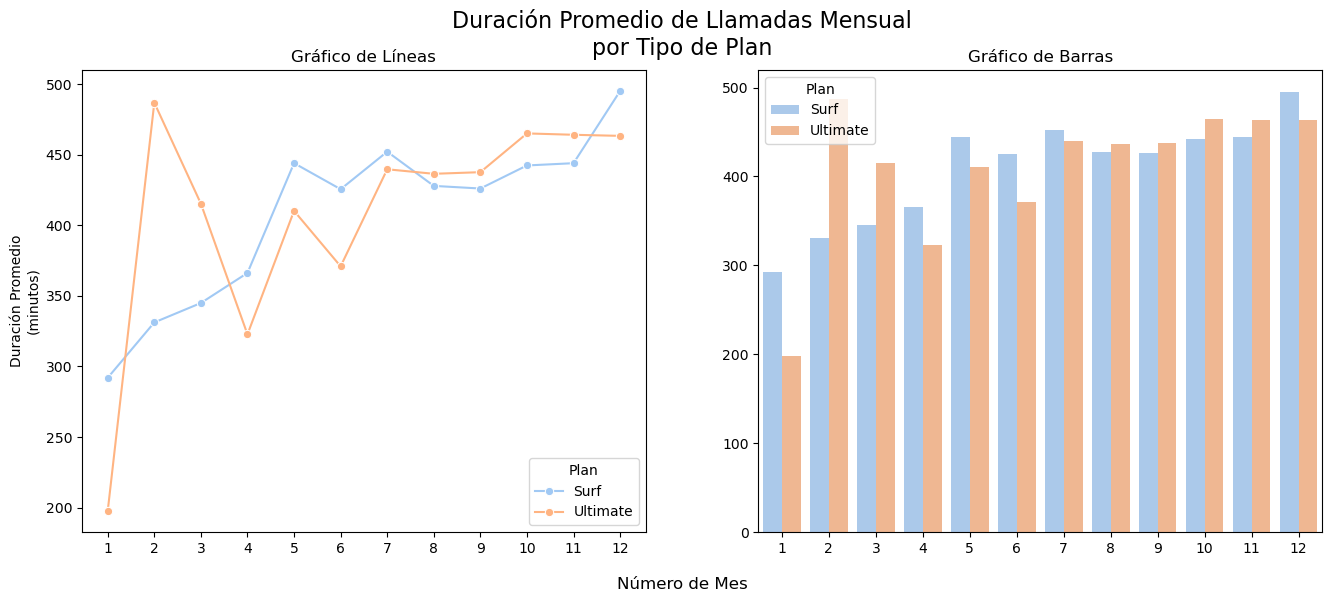

In [472]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupo por plan y mes
average_call_duration_chart = merged_user.groupby(['plan','month']).agg(
    average_call_duration = ('total_minutes','mean')
).reset_index()

# Capitalizo Surf y Ultimate
average_call_duration_chart['plan'] = average_call_duration_chart['plan'].str.capitalize()

# Agrego una paleta de colores
sns.set_palette('pastel')

# Creo una figura de subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Creo mi grafica de linea usando Seaborn
sns.lineplot(
    data=average_call_duration_chart, 
    x='month',
    y='average_call_duration', 
    hue='plan',
    marker='o',
    ax=axes[0]
).set(
    title='Gráfico de Líneas',
    # xlabel='Número de Mes',
    ylabel='Duración Promedio\n(minutos)',
    xticks=range(1,13),
)
#Capitalizo leyenda
axes[0].legend(title='Plan')
# Quito mi x label
axes[0].set_xlabel(None)

sns.barplot(
    data=average_call_duration_chart, 
    x='month',
    y='average_call_duration', 
    hue='plan',
    ax=axes[1]  # Specify which subplot to use
).set(
    title='Gráfico de Barras',
    # xlabel='Número de Mes',
    ylabel='Duración Promedio\n(minutos)'
)
# Capitalizo mi leyenda
axes[1].legend(title='Plan')
# Quito mi x y y axis label
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)

# Agrego mi titulo y mi x label compartido
fig.suptitle('Duración Promedio de Llamadas Mensual\npor Tipo de Plan', fontsize=16)
fig.supxlabel('Número de Mes', fontsize=12)

# Ajusto el limite de mi eje y
# plt.ylim(0, None)

# Enseño mi grafico
plt.show()

Elijo una gráfica de línea en lugar de una de barra para ver la tendencia de ambas sobre el tiempo, creo que me puede dar mejor insight en general.

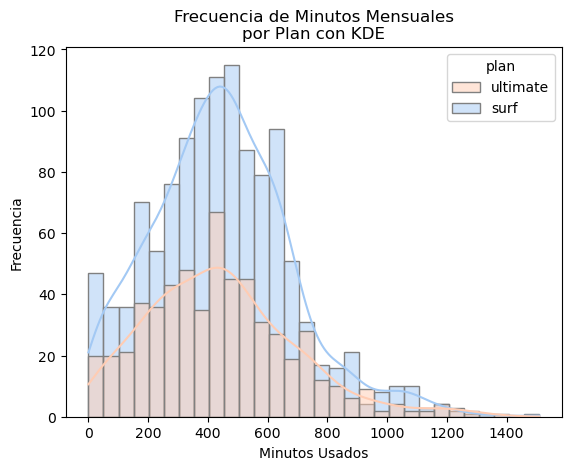

In [473]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Creo mi histograma
sns.histplot(
    data= merged_user,
    x='total_minutes',
    hue='plan',
    kde=True,
    edgecolor='gray',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'}
).set(
    title='Frecuencia de Minutos Mensuales\npor Plan con KDE',
    ylabel='Frecuencia',
    xlabel='Minutos Usados'
)

plt.show()

[Calcula la media y la varianza de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [426]:
# Calcula la media y la varianza de la duración mensual de llamadas.

call_duration_stat = merged_user.groupby(['plan','month']).agg(
    mean_call = ('total_minutes','mean'),
    variance_call = ('total_minutes','var')
).reset_index()

call_duration_stat

,plan,month,mean_call,variance_call
0,surf,1,292.000000,NaN
1,surf,2,331.200000,101102.200000
2,surf,3,344.937500,43077.929167
3,surf,4,366.228571,62626.652101
4,surf,5,443.981132,62096.326560
5,surf,6,425.514286,48249.180952
6,surf,7,452.101124,64931.160112
7,surf,8,427.873950,53786.483977
8,surf,9,426.020408,46732.033827
9,surf,10,442.348066,51974.861510


/var/folders/n_/c8gqs6bs2gn57l9_60ss831w0000gn/T/ipykernel_87652/4249659540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


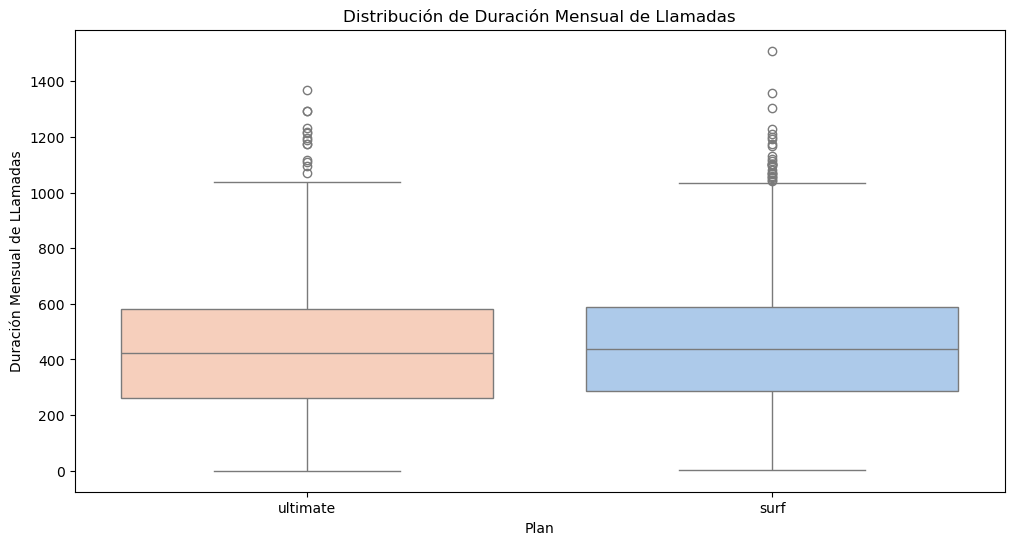

In [474]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=merged_user, 
    x='plan', 
    y='total_minutes',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'}
).set(
    title='Distribución de Duración Mensual de Llamadas',
    xlabel='Plan',
        ylabel='Duración Mensual de LLamadas'
)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

#### Conclusiones

Los datos muestran hallazgos muy interesantes, generalmente yo esperaria que el comportamiento de usuarios con plan ultimate y plan surf fueran bastante diferente, esto por que al final del día la cantidad de llamadas incluidas en el plan podria ser un factor por el cual el usuario decide usar el plan Ultimate en lugar del plan surf.

**Box Plot**  
Me ayuda a ver como se distribuyen los datos, el centro me marca la media y los outliers, no tomare en cuenta los outliers que ambos tienen. Lo interesante aqui es que las medias de ambas son altamente comparables, una diferencia minima donde los usuarios de surf tienen una media mayor en la promedio mensual de sus llamadas.

**Histrogram**  
La figura generada por ambas graficas es muy similar, como era de esperarse hay un poco menos frecuencia en el histograma de Ultimate, pero esto es por que tambien hay una menor cantidad de usuarios, sin embargo ambos histogramas se comportan de maneras bastante similares, vemos el pico en la duración de 300-600 minutos.

**Bar y Line Plot**
Tanto usuarios del plan Ultimate como del plan Surf empezar con un consumo bajo en duracion de llamadas a principios del 2018 y este fue en aumento conforme avanzo el año, teniendo una mayor duración de llamadas en los ultimos meses del año. Exceptuando el primer cuarto del año, el comportamiento de ambos planes es demasiado similar.

Aunque uno espera que las diferencias sean más marcadas por las caracteristicas de cada plan, el uso de minutos entre Surf y Ultimate resulta muy similar.

### Mensajes

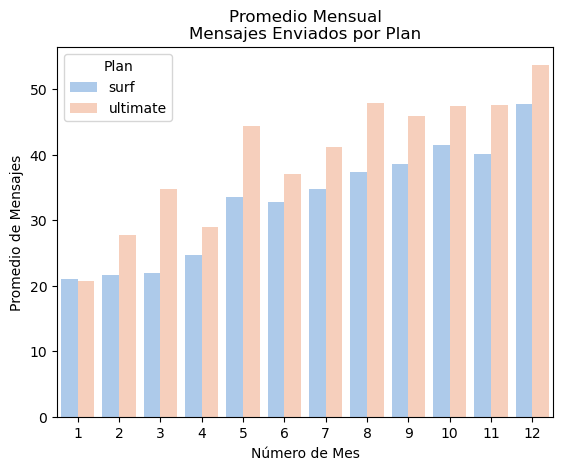

In [475]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupo por plan y usuario y por promedio de mensajes enviados
average_messages_sent = merged_user.groupby(['plan','month']).agg(
    avg_msg_sent = ('total_messages','mean')
).reset_index()

# Preparo mi grafica en SNS
sns.barplot(
    data=average_messages_sent,
    x='month',
    y='avg_msg_sent',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    hue='plan'
).set(
    title='Promedio Mensual\nMensajes Enviados por Plan',
    xlabel='Número de Mes',
    ylabel='Promedio de Mensajes'
)

# Legend Title and Show graph
plt.legend(title='Plan')
plt.show()

/var/folders/n_/c8gqs6bs2gn57l9_60ss831w0000gn/T/ipykernel_87652/4134357874.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


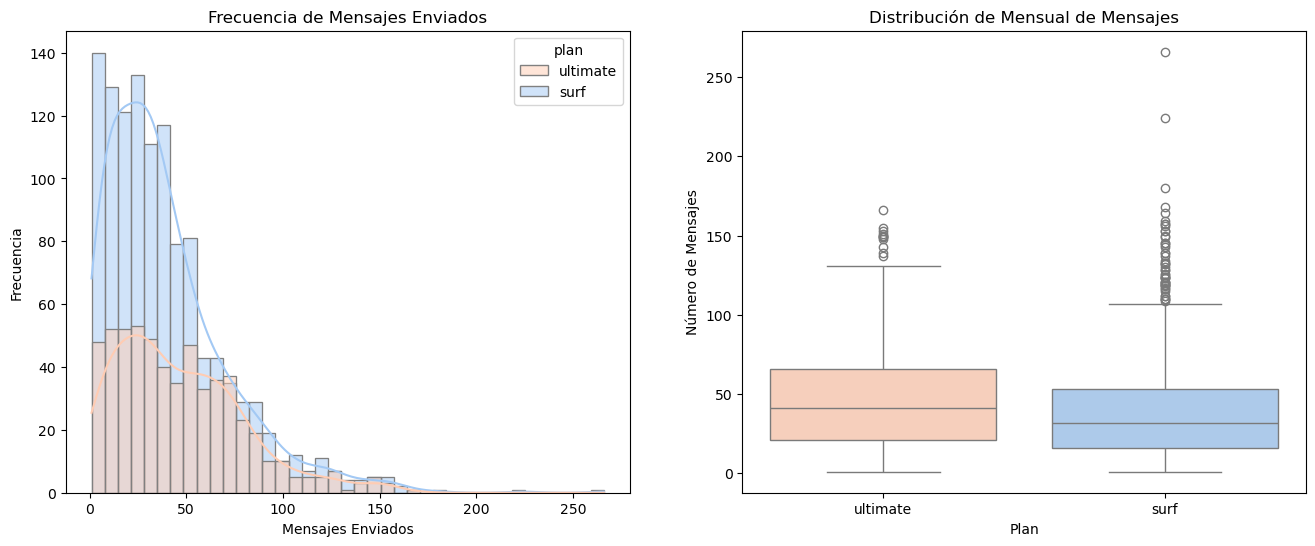

In [476]:
# Preparo mi histograma y mi boxplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ax 1 - Histogram
sns.histplot(
    data=merged_user,
    x='total_messages',
    hue='plan',
    kde=True,
    edgecolor= 'gray',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    ax=axes[0]
).set(
    xlabel='Mensajes Enviados',
    title='Frecuencia de Mensajes Enviados',
    ylabel='Frecuencia'
)

# Ax 2 - Boxplot
sns.boxplot(
    data=merged_user, 
    x='plan', 
    y='total_messages',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'}
).set(
    title='Distribución de Mensual de Mensajes',
    xlabel='Plan',
    ylabel='Número de Mensajes'
)

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

#### Conclusiones

Podemos ver rapidamente en mi boxplot que la media de ultimate es mayor que la media de surf, tambien los bigotes de mi caja son mayores en ultimate lo cual tiene sentido. Esto es debido a que los usuarios del plan "Ultimate" tienen 1000 mensajes al mes mientras que los del plan "Surf" tienen 50.  

La mayoria de los usuarios de Surf estan por debajo de este rango de este rango, lo podemos apreciar en el histograma, mientras que los usuarios de Ultimate si bien la mayoria manda hasta 60 mensajes, hay una distribución mas uniforme.  

En promedio ninguno de los dos planes sobrepasa 50 mensajes mensuales. Por otra parte, podemos apreciar que a principios de año se envian menos mensajes que a finales de año, esto tendria sentido con las festividades. A traves de todo el año podemos ver mas mensajes enviados en promedio por parte de los usuario del plan 'Ultimate'

### Internet

In [480]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Agrupo para sacar la cantidad de trafico por plan por mes
average_gb_used = merged_user.groupby(['plan','month']).agg(
    avg_gb_used = ('total_mb','mean')
).reset_index()

# Lo convierto a GB para facilidad de lectura y lo redondeo a 2 espacios decimales
average_gb_used['avg_gb_used'] = (average_gb_used['avg_gb_used']/1024).round(2)

average_gb_used

,plan,month,avg_gb_used
0,surf,1,7.71
1,surf,2,9.09
2,surf,3,12.11
3,surf,4,11.57
4,surf,5,14.50
5,surf,6,15.20
6,surf,7,16.32
7,surf,8,16.76
8,surf,9,16.11
9,surf,10,17.00


/var/folders/n_/c8gqs6bs2gn57l9_60ss831w0000gn/T/ipykernel_87652/30151411.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


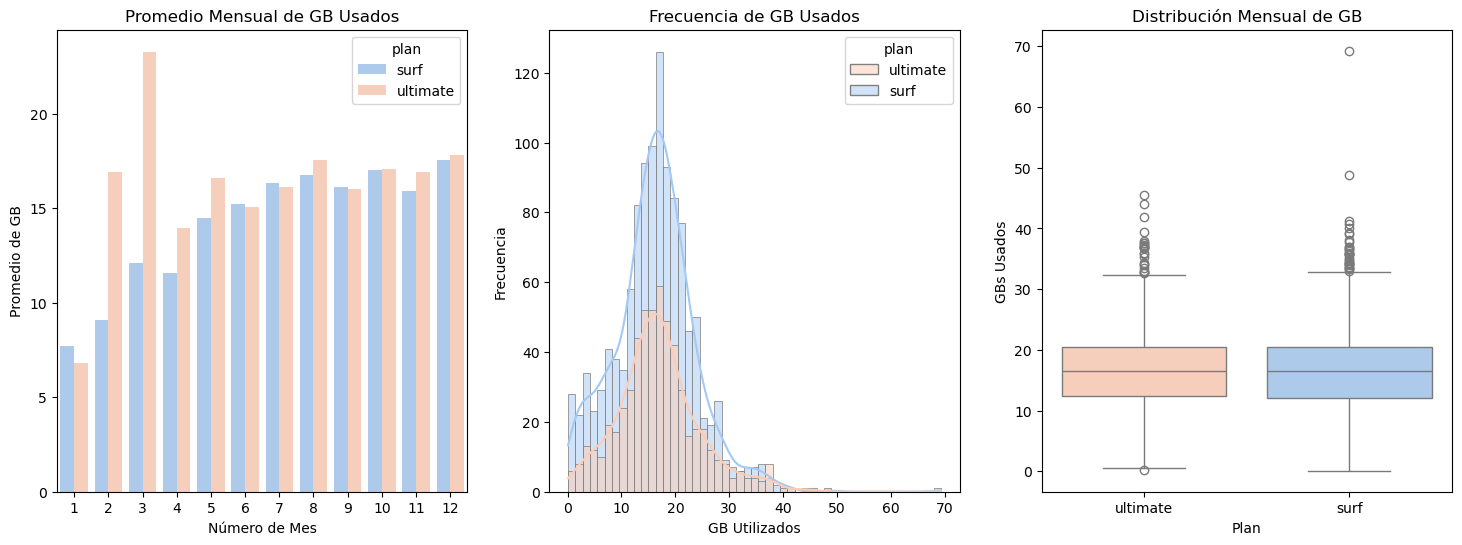

In [489]:
# Preparo mi triple ax
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Ax 1 - Bar Graph
sns.barplot(
    data=average_gb_used,
    x='month',
    y='avg_gb_used',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    hue='plan',
    ax=axes[0]
).set(
    title='Promedio Mensual de GB Usados',
    xlabel='Número de Mes',
    ylabel='Promedio de GB'
)

# Ax 2 - Histogram
sns.histplot(
    data=merged_user,
    x=merged_user['total_mb'] / 1024,
    hue='plan',
    kde=True,
    edgecolor= 'gray',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    ax=axes[1]
).set(
    xlabel='GB Utilizados',
    title='Frecuencia de GB Usados',
    ylabel='Frecuencia'
)

# Ax 3 - Boxplot
sns.boxplot(
    data=merged_user, 
    x='plan', 
    y=merged_user['total_mb'] / 1024,
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    ax=axes[2]
).set(
    title='Distribución Mensual de GB',
    xlabel='Plan',
    ylabel='GBs Usados',
)

# Show graph
plt.show()

#### Conclusiones

Podemos observar que en promedio mensualmente los usuarios del plan Ultimate consumen mas GB, como era de esperarse, pero tambien podemos ver que a partir de Julio (mes 7) los usuario de surf en promedio exceden el limite de 15GB de su plan. La frecuencia se comporta de manera muy similar, la diferencia es que podemos ver que la gran mayoria de usuarios estan excediendose de su limite, es decir estan pagando por GB adicionales. finalmente podemos ver que aunque la media sea parecida en el boxplot, el limite de GB es diferente, si bien un porcentaje muyb pequeño de usuarios de ultimate paga por GB adicionales, los de surf no es asi.

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [493]:
# Busco el promedio mensual de ingreso por tipo de plan

avg_monthly_income = merged_user.groupby(['plan','month']).agg(
    avg_payed = ('total_monthly','mean')
).reset_index()

avg_monthly_income

,plan,month,avg_payed
0,surf,1,20.000000
1,surf,2,23.914000
2,surf,3,38.540625
3,surf,4,40.591429
4,surf,5,50.857170
5,surf,6,52.081000
6,surf,7,61.806404
7,surf,8,64.383109
8,surf,9,57.196871
9,surf,10,65.368343


/var/folders/n_/c8gqs6bs2gn57l9_60ss831w0000gn/T/ipykernel_87652/3518709989.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


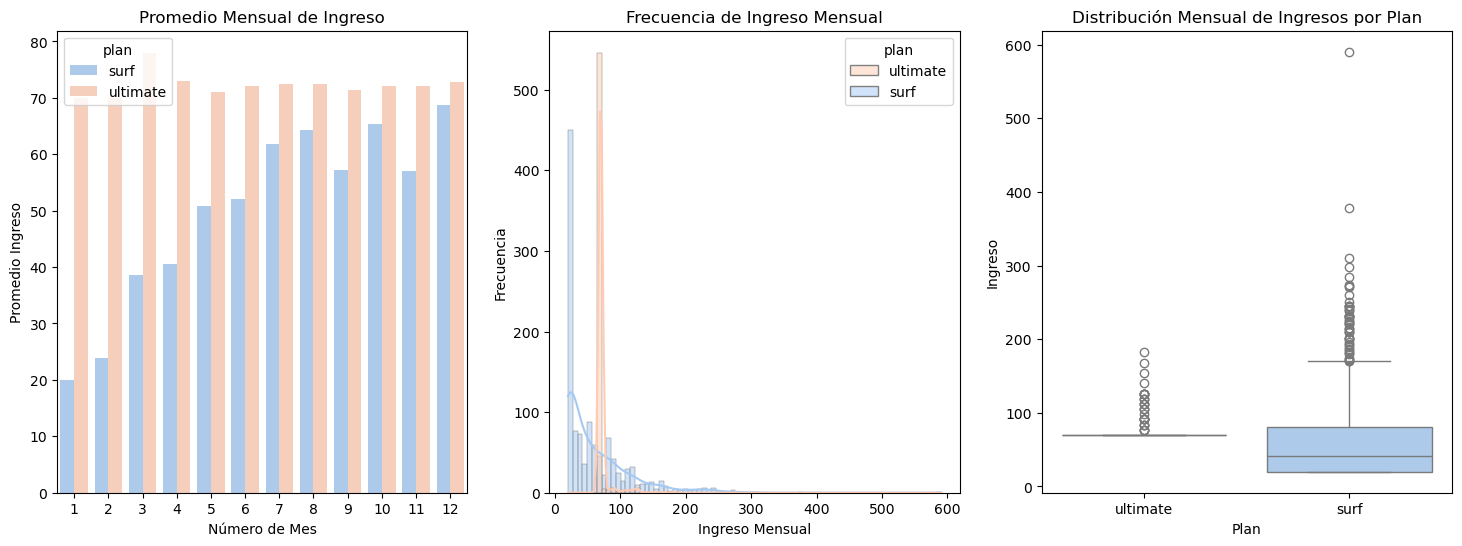

In [494]:
# Preparo mi triple ax
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Ax 1 - Bar Graph
sns.barplot(
    data=avg_monthly_income,
    x='month',
    y='avg_payed',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    hue='plan',
    ax=axes[0]
).set(
    title='Promedio Mensual de Ingreso',
    xlabel='Número de Mes',
    ylabel='Promedio Ingreso'
)

# Ax 2 - Histogram
sns.histplot(
    data=merged_user,
    x='total_monthly',
    hue='plan',
    kde=True,
    edgecolor= 'gray',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    ax=axes[1]
).set(
    xlabel='Ingreso Mensual',
    title='Frecuencia de Ingreso Mensual',
    ylabel='Frecuencia'
)

# Ax 3 - Boxplot
sns.boxplot(
    data=merged_user, 
    x='plan', 
    y='total_monthly',
    palette={'surf': '#A3C9F4', 'ultimate': '#FFCCB3'},
    ax=axes[2]
).set(
    title='Distribución Mensual de Ingresos por Plan',
    xlabel='Plan',
    ylabel='Ingreso',
)

# Show graph
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

In [495]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


#### Conclusiones

Aqui lo primero que brinca inmediatamente son los promedios de gasto mensual, podemos ver que la mayoria de los usuarios 'ultimate' gastan en promedio 70 usd, y se mantienen, es decir siempre estan por el costo muy cercano al costo del plan y rara vez pagan adicionales. Por otra parte, los usuarios 'surf' en Enero su promedio fue de 20 dls, es decir, su costo del plan, pero despues de enero hay una tendencia a la alza y podemos ver que van consumiendo mas y mas como adicionales.  

En el histograma podemos ver que virtualmente todos los usarios de ultimate se encuentra en 70 usd, por la otra parte, una mayoria de usuarios de surf se encuentran en 20 usd mas o menos, pero podemos ver que si hay una cantidad de usuarios que pagan mas de esta cantidad.  

Finalmente podemos ver que la media de 'surf' es mas cercana a 50 que a 20, lo cual indica que una buena partwe de usuariios suele excederse en su plan, tambien los outliers son mas extremos en el caso de usuarios de 'surf', con usuarios alcanzando hasta casi 600 USD mensuales.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis

# Filtro para valores de ultimate y de surf
ultimate_monthly_income = merged_user.query("plan == 'ultimate'")['total_monthly']
surf_monthly_income = merged_user.query("plan == 'surf'")['total_monthly']

alpha = 0.05

# Prueba t
results_plan = st.ttest_ind(ultimate_monthly_income, surf_monthly_income, equal_var=False)

alpha = 0.05

print('valor p: ', results_plan.pvalue) 

if results_plan.pvalue < alpha: # Comparar el valor p con el umbral
    print('Rechazamos la hipótesis nula, hay una diferencia entre el promedio de ingresos')
else:
    print('No podemos rechazar la hipótesis nula')

valor p:  5.756661975640558e-13
Rechazamos la hipótesis nula, hay una diferencia entre el promedio de ingresos


Si hay una diferencia significativa en los ingresos entre usuarios del plan "Surf" y "Ultimate"

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

Podria ayudar si hago todo lowercase o uppercase?

In [523]:
merged_regions = pd.merge(merged_user, users, on=['user_id'])

# Uso str.contains para poder checar si NY-NJ esta dentro de todo el string de city
nynj_users = merged_regions[merged_regions['city'].str.contains('NY-NJ')]
# Uso ~ para evitar valores de NY | NJ, es decir, que no los contenga
other_users = merged_regions[~merged_regions['city'].str.contains('NY-NJ')]

# Hago mis series donde solamente tenga el total mensual de los usuarios de NYNJ y los de otro lugar
nynj_users_total = nynj_users['total_monthly']
other_users_total = other_users['total_monthly']


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [525]:
# Prueba las hipótesis

# Prueba de Levene para ver si mi varianza es igual
levene_stat, levene_p_value = st.levene(nynj_users_total, other_users_total)
alpha = 0.05

# Comparar valor
if levene_p_value < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Como las varianzas son iguales:

In [530]:
# Prueba t
results_nynj = st.ttest_ind(nynj_users_total, other_users_total, equal_var=True)
alpha = 0.05

print('valor p: ', results_plan.pvalue) 

# Interpretación de los resultados
if results_nynj.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en el ingreso promedio entre los usuarios de NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que el ingreso promedio entre los usuarios de NY-NJ y otras regiones es diferente.")

valor p:  5.756661975640558e-13
Rechazamos la hipótesis nula. Hay una diferencia significativa en el ingreso promedio entre los usuarios de NY-NJ y otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con las pruebas de hipótesis. Además, lo complementaste con la prueba de levene para msotrr el supuestos de varianzas iguales. Sigue disfrutando los siguientes cursos!

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

En conclusion, eeste proyecto utilizo varias técnicas de Data Wrangling, Manejo de Datos, Graficas y Analisis estadistico.  

Empezamos importando las librerias y las bases de datos en formato csv y pasarlos a df. Continuamos en limpiar los datos, los cuales practicamente ya venian limpios salvo que fue necesario pasar a datetime las columnas que tuvieran alguna fecha. Despues de esto empezamos a enriquecer los datos y hacer los filtrados inciales, un ejemplo es el agruparlos para encontrar el consumo o llamadas por mes.  

Ya terminando la preparación de los datos, continue con el analisis estadistico, para esto empece a graficar para buscar información relevante en las llamadas, mensajes, internet e ingresos [que yo hubiera dicho mas como gasto]. Estudie los patrones y empece a hacer aseveraciones de la conducta de los usuarios.  

Finalmente cerre realizando dos pruebas de hipotesis, ver si habia diferencia notable entre la media de ingresos del plan ultimate y surf, a lo cual podemos decir que si hay una diferencia entre ambos y por otra parte tambien hice una prueba de hipotesis para la region de NYNJ, donde encontramos que tambien hay una diferencia significativa (nuestro valor p es mayor que 0.05[alpha])